In [1]:
import sys, os
from pathlib import Path
import glob
sys.path.append(str(Path(os.getcwd()).parent))

from runner import DQNRunner, PolicyGradientRunner, ActorCriticRunner
from network import Feedforward
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle


%load_ext autoreload
%autoreload 2


In [2]:
runners = defaultdict(lambda: [])
runner_classes = [DQNRunner, PolicyGradientRunner, ActorCriticRunner]
for filename in glob.glob("../saved_runners/*.pkl"):
    runner_classname = filename.split("/")[-1].split("_")[0]
    with open(filename, "rb") as f:
        runner = pickle.load(f)
    runners[runner_classname].append(runner)

/Users/jordanlei/Github/reinforcement-learning-transformers/.venv/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


(20, 200000)
(20, 200000)
(20, 200000)


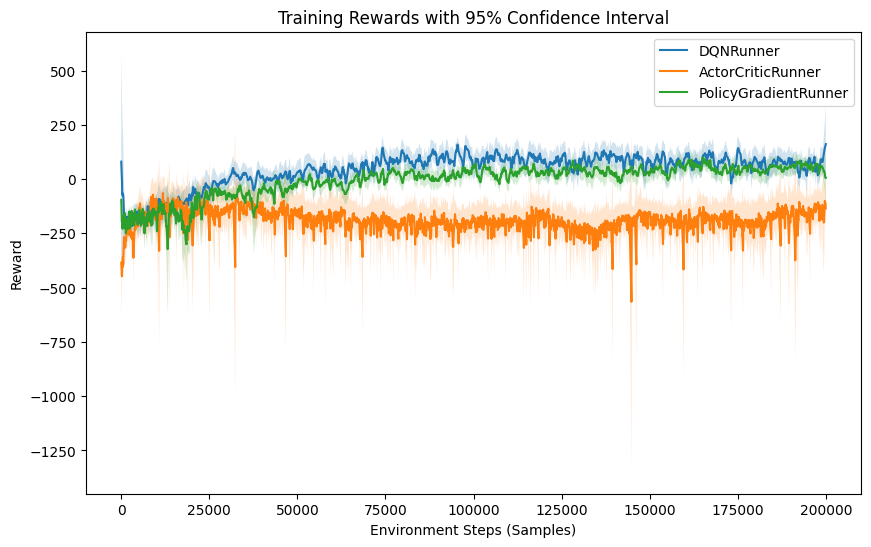

In [6]:
import numpy as np
from scipy.interpolate import interp1d


step_points = np.arange(0, 2e5)
plt.figure(figsize=(10, 6))

for runner_cl in runners.keys():
    rewards_interps = []
    for runner in runners[runner_cl]:
        rewards = runner.metrics["rewards"]
        steps = runner.metrics["reward_steps"]

        # Create interpolation function
        reward_interp = interp1d(steps, rewards, kind='linear', fill_value='extrapolate')

        rewards_interp = reward_interp(step_points)
        rewards_interps.append(rewards_interp)

    rewards_interps = np.array(rewards_interps)
    print(rewards_interps.shape)
    mean = np.mean(rewards_interps, axis=0)
    std = np.std(rewards_interps, axis=0)
    ci = 1.96 * std / np.sqrt(len(rewards_interps))

    plt.plot(step_points, mean, label=runner_cl)
    plt.fill_between(step_points, mean - ci, mean + ci, alpha=0.2)

plt.xlabel('Environment Steps (Samples)')
plt.ylabel('Reward')
plt.title('Training Rewards with 95% Confidence Interval')
plt.legend()
# plt.show()
plt.savefig('reward_plot.png')

In [7]:
runners["DQNRunner"][0].play_and_save_gif(title = "DQN Demo", filename = "dqn_demo.gif")

Saved GIF to dqn_demo.gif (Total reward: 204.0, Steps: 304)


In [19]:
runners["ActorCriticRunner"][2].play_and_save_gif(title = "Actor Critic Demo", filename = "actor_critic_demo.gif")

Saved GIF to actor_critic_demo.gif (Total reward: -105.2, Steps: 404)


In [13]:
runners["PolicyGradientRunner"][1].play_and_save_gif(title = "Policy Gradient Demo", filename = "policy_gradient_demo.gif")

Saved GIF to policy_gradient_demo.gif (Total reward: 219.9, Steps: 648)
